<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/yule's_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
yule_data = pd.read_stata('yule.dta')

In [45]:

"""
location: geolocation
paup: number of paupers at the location
outrelief:people living outdoors
old: people above age of 65
pop: total population
"""
yule_data.head()

,location,paup,outrelief,old,pop
0,Kensington,27,5,104,136
1,Paddington,47,12,115,111
2,Fulham,31,21,85,174
3,Chelsea,64,21,81,124
4,St. George’s,46,18,113,96


In [47]:
yule_data['log_paup'] = np.log(yule_data['paup'])
yule_data['box_cox_paup'],_ = stats.boxcox(yule_data['paup'])
yule_data['sqrt_paup'] = np.sqrt(yule_data['paup'])

In [48]:
yule_data.describe()

,paup,outrelief,old,pop,log_paup,box_cox_paup,sqrt_paup
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,50.343750,25.156250,99.187500,119.968750,3.865234,7.039573,7.003906
std,16.487746,12.796445,9.106671,30.247884,0.338379,0.999004,1.165039
min,23.000000,5.000000,81.000000,68.000000,3.134766,5.035287,4.796875
25%,37.000000,18.000000,93.750000,97.750000,3.611328,6.265223,6.082031
50%,49.500000,22.000000,100.500000,111.000000,3.900391,7.100843,7.033203
75%,61.000000,33.500000,103.000000,137.250000,4.109375,7.749118,7.808594
max,81.000000,64.000000,119.000000,203.000000,4.394531,8.688412,9.000000


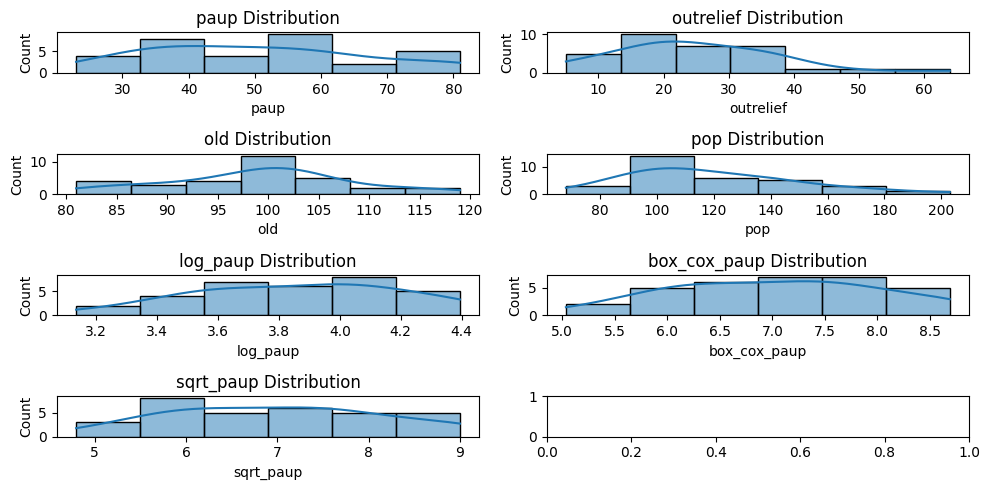

In [49]:
fig,axs = plt.subplots(4,2, figsize = (10,5))
axs = axs.flatten()
for ax , var in zip(axs,['paup','outrelief','old','pop','log_paup','box_cox_paup','sqrt_paup']):
  sns.histplot(yule_data[var], kde = True,ax=ax)
  ax.set_title(f"{var} Distribution")

plt.tight_layout()
plt.show()

In [50]:
models = ['paup ~ outrelief + old + pop',
          'log_paup ~ outrelief + old + pop',
          'box_cox_paup ~ outrelief + old + pop',
          'sqrt_paup ~ outrelief + old + pop']
results = [smf.ols(model, data = yule_data).fit() for model in models]

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = yule_data[['outrelief', 'old', 'pop']]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Variable         VIF
0      const  258.695244
1  outrelief    1.014894
2        old    1.407259
3        pop    1.390807


In [51]:
for name, model in zip(['no_trans', 'log', 'box-cox', 'sqrt' ],results):
  st,p = stats.shapiro(model.resid)
  print(f"{name} ->> Statistic={st}, p={p}, isnormal:{p > 0.05}")

no_trans ->> Statistic=0.9232359224139955, p=0.025470271555661884, isnormal:False
log ->> Statistic=0.9646115803961544, p=0.3652593285008372, isnormal:True
box-cox ->> Statistic=0.9614418230607085, p=0.3006537509648869, isnormal:True
sqrt ->> Statistic=0.951106252080271, p=0.1549268062074794, isnormal:True


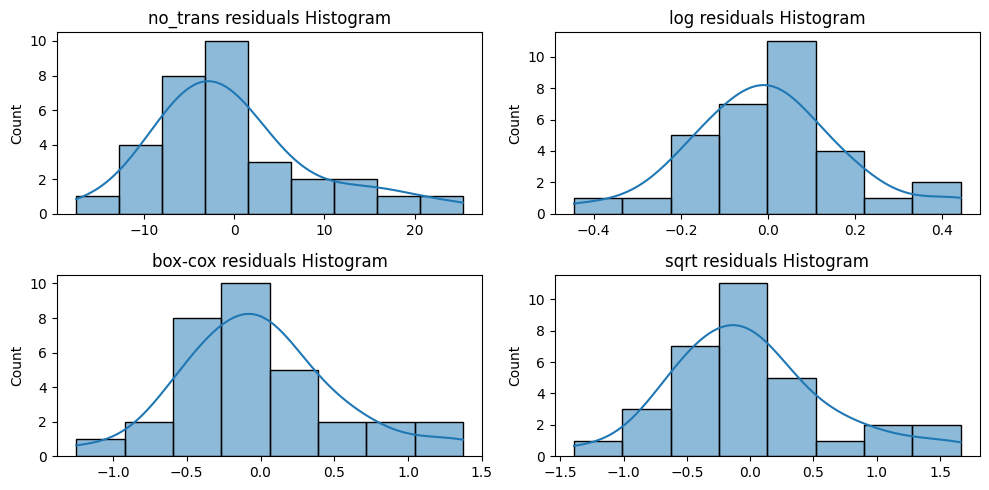

In [55]:
fig,axs = plt.subplots(2,2, figsize = (10,5))
axs = axs.flatten()
for name,model,ax in zip(['no_trans', 'log', 'box-cox', 'sqrt' ],results,axs):
  sns.histplot(model.resid,kde=True,ax=ax)
  ax.set_title(f"{name} residuals Histogram")
plt.tight_layout()
plt.show()

In [56]:
results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_paup   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     22.70
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.17e-07
Time:                        11:59:30   Log-Likelihood:                 9.4990
No. Observations:                  32   AIC:                            -11.00
Df Residuals:                      28   BIC:                            -5.135
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0553      0.547      7.419      0.000       2.936       5.175
outrelief      0.0152      0.003      5.591      0.000       0.010       0.021
old            0.0020      0.004      0.442      0.662      -0.007       0.011
pop           -0.0064      0.001     -4.765      0.000      -0.009      -0.004
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.280
Skew:                           0.266   Prob(JB):                        0.527
Kurtosis:                       3.822   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0.64

log_pauper = 0.015*out_relief + 0.002*old - 0.0064*pop

A unit change in outdoor relief amounts to 1.5 %  increase in the pauperism